**Christou Nektarios - High Scale Analytics 2022-2023 NKUA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The provided code contains functions for computing distances between sequences using Dynamic Time Warping (DTW). The `dtw` function computes the DTW distance between two sequences, allowing for variations in the time dimension to measure their similarity. The `dtw_window` function extends the DTW calculation by constraining alignment within a specified window, providing the DTW distance while considering the window size.


In [2]:
def euclidean_distance(vect_x, vect_y):
    """
    Computes the Euclidean distance between two vectors vect_x and vect_y.
    Args:
    - vect_x: First vector
    - vect_y: Second vector
    Returns:
    - Euclidean distance between vect_x and vect_y
    """
    return np.sqrt(sum((y - x) ** 2 for x, y in zip(vect_x, vect_y)))


def dtw(x, y):
    """
    Computes the Dynamic Time Warping (DTW) distance between two sequences x and y.
    DTW measures the similarity between two sequences accounting for variations in the time dimension.
    Args:
    - x: First sequence
    - y: Second sequence
    Returns:
    - DTW distance between sequences x and y
    """
    x = np.array(x[1:-1].split(","), dtype=float)  # Transform x into an array
    y = np.array(y[1:-1].split(","), dtype=float)  # Transform y into an array

    x_size, y_size = x.size, y.size  # Get sizes of sequences

    # Initialize distance matrix with infinite values
    D = np.zeros((x_size + 1, y_size + 1))
    for i in range(x_size + 1):
        for j in range(y_size + 1):
            D[i, j] = np.inf
    D[0, 0] = 0  # Set the starting point to 0

    # Calculate cost matrix using the Euclidean distance
    for i in range(1, x_size + 1):
        for j in range(1, y_size + 1):
            cost = euclidean_distance([x[i - 1]], [y[j - 1]])  # Calculate distance between elements
            min_dist = np.min((D[i - 1, j], D[i, j - 1], D[i - 1, j - 1]))  # Find the minimum distance
            D[i, j] = cost + min_dist  # Update the distance matrix

    return D[x_size, y_size]  # Return the DTW distance


def dtw_window(x, y, window):
    """
    Computes the Dynamic Time Warping (DTW) distance between sequences x and y within a specified window.
    DTW measures the similarity between sequences while limiting the alignment to a window.
    Args:
    - x: First sequence
    - y: Second sequence
    - window: Size of the window to constrain alignment
    Returns:
    - DTW distance between sequences x and y within the given window
    """
    x = np.array(x[1:-1].split(","), dtype=float)  # Transform x into an array
    y = np.array(y[1:-1].split(","), dtype=float)  # Transform y into an array

    x_size, y_size = x.size, y.size  # Get sizes of sequences

    w = np.max([window, abs(x_size - y_size)])  # Calculate the window size

    # Initialize distance matrix with infinite values
    D = np.zeros((x_size + 1, y_size + 1))
    for i in range(x_size + 1):
        for j in range(y_size + 1):
            D[i, j] = np.inf
    D[0, 0] = 0  # Set the starting point to 0

    # Initialize the border of the matrix within the window
    for i in range(1, x_size + 1):
        for j in range(np.max([1, i - w]), np.min([y_size, i + w]) + 1):
            D[i, j] = 0

    # Calculate cost matrix within the window using the Euclidean distance
    for i in range(1, x_size + 1):
        for j in range(np.max([1, i - w]), np.min([y_size, i + w]) + 1):
            cost = euclidean_distance([x[i - 1]], [y[j - 1]])  # Calculate distance between elements
            min_dist = np.min((D[i - 1, j], D[i, j - 1], D[i - 1, j - 1]))  # Find the minimum distance
            D[i, j] = cost + min_dist  # Update the distance matrix

    return D[x_size, y_size]  # Return the DTW distance within the window


# Usage

In [3]:
# Load dataset
data = pd.read_csv('./dataset/dtw_test.csv')
print("Shape of data: ", data.shape)

Shape of data:  (1002, 3)


In [4]:
data.head()

,id,series_a,series_b
0,0,"[75.125, 75.32, 75.06, 74.88, 74.92, 74.83, 75...","[75.125, 75.32, 74.88, 74.92, 74.83, 75.0, 74...."
1,1,"[26.0, 25.995, 25.8307, 25.85, 26.0, 26.0, 26....","[26.0, 25.8307, 26.0, 26.0, 26.0, 26.1471, 26...."
2,2,"[60.23, 60.1, 59.8589, 60.01, 60.19, 60.08, 60...","[59.8589, 60.19, 60.4, 60.59, 60.27, 60.23, 60..."
3,3,"[28.4, 28.65, 28.75, 28.65, 28.7099, 28.8, 28....","[28.4, 28.65, 28.7099, 29.0, 29.0651, 28.8, 28..."
4,4,"[4.98, 4.95, 4.88, 4.91, 4.93, 4.9, 4.9, 4.9, ...","[4.91, 4.93, 4.9, 4.9, 4.9132, 4.9344, 4.9155,..."


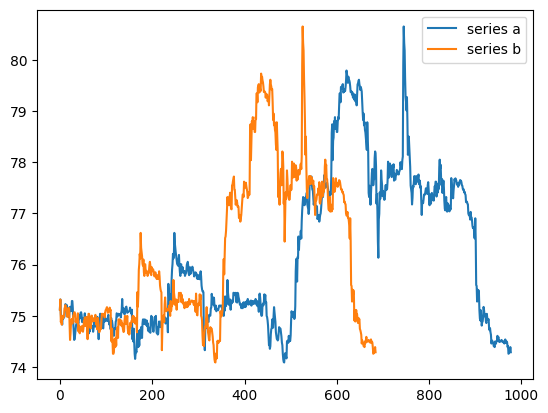

In [5]:
# Plot the first two time series to see how they compare with each other
series_a_idx = 0
series_b_idx = 0

x = np.array(data.loc[series_a_idx,"series_a"][1:-1].split(","), dtype=float)
y = np.array(data.loc[series_b_idx,"series_b"][1:-1].split(","), dtype=float)

plt.plot(x, label="series a")
plt.plot(y, label="series b")

plt.legend()
plt.show()

The distance calculated from both created functions are pretty much the same. Of course, this varies depending on the window size.

In [6]:
# Get the distance for two time series
x = data.loc[0,"series_a"]
y = data.loc[0,"series_b"]
dist_xy = dtw(x,y)
print(f"Distance of x-y {dist_xy}")

Distance of x-y 18.875199999999992


In [7]:
# Get the distance for two time series with the window method
x = data.loc[0,"series_a"]
y = data.loc[0,"series_b"]
dist_xy = dtw_window(x,y,5)
print(f"Distance of x-y {dist_xy}")

Distance of x-y 18.875199999999992


Calculate the DTW distance of each pair of series:

In [8]:
results = pd.DataFrame(columns=['results_dtw', 'results_dtw_window'])

# Calculate the DTW distance of each pair of series with the window constraint
window = 5
results["results_dtw"] = data[["series_a","series_b"]].apply(
    lambda x: dtw_window(x["series_a"], x["series_b"], window=window), axis=1)

# Calculate the DTW distance of each pair of series without the window constaint
results["results_dtw_window"] = data[["series_a","series_b"]].apply(
    lambda x: dtw(x["series_a"], x["series_b"]), axis=1)